[//]: # (Copyright c 2021, Alessandro Abate, Daniele Ahmed, Alec Edwards, Mirco Giacobbe, Andrea Peruffo)
[//]: # (All rights reserved.)
[//]: # (This source code is licensed under the BSD-style license found in the)
[//]: # (LICENSE file in the root directory of this source tree. )

# FOSSIL Benchmarks

This notebook serves as a demonstration of the tool benchmarks. A set seed is used for repeatability.

[FOSSIL-playground](FOSSIL-playground.ipynb).

## Lyapunov Function Benchmarks
1. ### [Nonpoly 0](#non-poly0)
1. ### [Nonpoly 1](#non-poly1)
1. ### [Nonpoly 2](#non-poly3)
1. ### [Nonpoly 3](#non-poly3)
1. ### [Poly 1](#poly1)
1. ### [Poly 2](#poly2)
1. ### [Poly 3](#poly3)
1. ### [Poly 4](#poly4)
1. ### [Hybrid Lyapunov](#hi-lyap)

## Barrier Function Benchmarks
1. ### [Barrier 1](#darboux)
1. ### [Barrier 2](#elementary)
1. ### [Barrier 3](#polynomial)
1. ### [Barrier 4](#obstacle)
1. ### [Hybrid Barrier](#hybrid)
1. ### [Hi-Ord4](#hi-ord4)
1. ### [Hi-Ord6](#hi-ord6)
1. ### [Hi-Ord8](#hi-ord8)

In [1]:
# % Imports
import sys
sys.path.append('..')
from experiments.playground_utils import *
from experiments.benchmarks.benchmarks_bc import *
from experiments.benchmarks.benchmarks_lyap import twod_hybrid as hy_lyap 
from src.plots.plot_lyap import plot_lyapunov_fcn
from src.plots.plot_barriers import *

<a id='non-poly0'></a> 
## Non-poly 0

\begin{cases}
\dot{x} =  -x+xy, 
\\
\dot{y} =  -y, 
\end{cases}

Single Equilibrium point found: 
 [(0, 0)]
  learner   0
0 - loss: 6.13293981552124 - acc: 58.6 %
  translator   0
Candidate: (pow(( - 0.244 * x0 - 0.676 * x1), 2) + pow(( - 0.146 * x0 + 1.216 * x1), 2))
  verifier   0
Counterexample Found: x0 : [9.846872884332737996, 9.846873195223373898]
x1 : [1.743292668714171656, 1.743292895789005925]
V(ctx) =  13.289696553428621
Vdot(ctx) =  -5.4261789728116128e-07
  consolidator   0
  learner   1
0 - loss: -0.05796129256486893 - acc: 99.04214559386973 %
  translator   1
Candidate: (pow(( - 0.246 * x0 - 0.689 * x1), 2) + pow(( - 0.133 * x0 + 1.242 * x1), 2))
  verifier   1
No counterexamples found!
  consolidator   1
Found a Lyapunov function
Learner times: total=1.3419661200023256s,min=0.013433073003398022s,max=1.3285330469989276s,avg=0.6709830600011628s
Translator times: total=0.001684995000687195s,min=0.0006027780000295024s,max=0.0010822170006576926s,avg=0.0008424975003435975s
Verifier times: total=0.012195232000522083s,min=0.002372104998357827

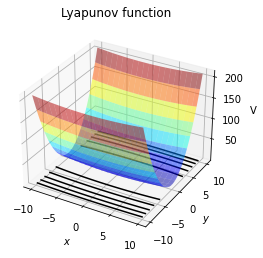

In [2]:
torch.manual_seed(167)
N_Dimensions = 2

x0, x1 = initialise_states(N_Dimensions)

dynamics = [
    -x0 + x0 * x1,
    -x1
]
activations =  [ActivationType.SQUARE]
neurons = [2] 
parameters = {CegisConfig.VERIFIER.k:VerifierType.DREAL, CegisConfig.ACTIVATION.k: activations, 
              CegisConfig.N_HIDDEN_NEURONS.k:neurons,   CegisConfig.POSITIVE_DOMAIN.k:True,
              CegisConfig.LLO.k:True, CegisConfig.SP_HANDLE.k:False}

mode = PrimerMode.LYAPUNOV

f_n, f_s = synthesise(dynamics, mode, OUTER_RADIUS=10, INNER_RADIUS=0.01,CEGIS_PARAMETERS=parameters)

x = np.array([x0,x1]).reshape(-1,1)
plot_lyapunov_fcn(x, f_s, dynamics)

<a id='non-poly1'></a> 
## Non-poly 1

\begin{cases}
\dot{x} = -x + 2x^2y \\
\dot{y} = - y, 
\end{cases}


Single Equilibrium point found: 
 [(0, 0)]
  learner   0
0 - loss: 842.2959594726562 - acc: 45.0 %
  translator   0
Candidate: (... +
 ... +
 ... +
 ... +
 ... +
 ... +
 ... +
 ... +
 ... +
 ... +
 ... +
 ... +
 ... +
 ... +
 ... +
 ... +
 ... +
 ... +
 ... +
 ...)*
...
  verifier   0
Counterexample Found: [x1 = 1/16, x0 = 9]
V(ctx) =  19476106836999190301158611130771506218760983162774394466609609140902032497/6400000000000000000000000000000000000000000000000000000000000000000000000
Vdot(ctx) =  3447928540862120133122806197007742204523804823084561217/3200000000000000000000000000000000000000000000000000000
  consolidator   0
  learner   1
0 - loss: 0.014227322302758694 - acc: 95.78544061302682 %
  translator   1
Candidate: (... +
 ... +
 ... +
 ... +
 ... +
 ... +
 ... +
 ... +
 ... +
 ... +
 ... +
 ... +
 ... +
 ... +
 ... +
 ... +
 ... +
 ... +
 ... +
 ...)*
...
  verifier   1
No counterexamples found!
  consolidator   1
Found a Lyapunov function
Learner times: total=0.4228424680004536

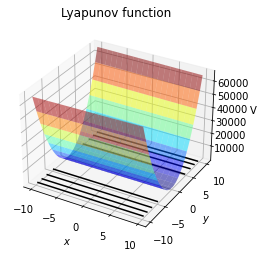

In [3]:
torch.manual_seed(167)
N_Dimensions = 2
x0, x1 = initialise_states(N_Dimensions)

dynamics = [
    -x0 +2*x0**2 * x1,
    -x1
]
activations =  [ActivationType.LINEAR, ActivationType.SQUARE]
neurons = [20, 20] 
parameters = {CegisConfig.ACTIVATION.k: activations, CegisConfig.N_HIDDEN_NEURONS.k:neurons, 
              CegisConfig.POSITIVE_DOMAIN.k:True, CegisConfig.LLO.k:True, CegisConfig.SP_HANDLE.k:False}

mode = PrimerMode.LYAPUNOV

f_n, f_s = synthesise(dynamics, mode, OUTER_RADIUS=10, INNER_RADIUS=0.01, CEGIS_PARAMETERS=parameters)

x = np.array([x0,x1]).reshape(-1,1)
plot_lyapunov_fcn(x, simplify_f(f_s), dynamics)

<a id='non-poly2'></a> 
## Non-poly 2
\begin{cases}
\dot{x} = -x \\
\dot{y} = - 2y + 0.1 x y^2 + z \\
\dot{z} = -z -1.5 y, 
\end{cases}

In [4]:
torch.manual_seed(167)
N_Dimensions = 3
x0, x1, x2 = initialise_states(N_Dimensions)

dynamics = [
    -x0,
    -2*x1 + 0.1*x0*x1**2 + x2,
    -x2 - 1.5*x1
]
activations =  [ActivationType.LINEAR, ActivationType.SQUARE]
neurons = [10, 10]
parameters = {CegisConfig.ACTIVATION.k: activations, CegisConfig.N_HIDDEN_NEURONS.k:neurons,
              CegisConfig.POSITIVE_DOMAIN.k:True, CegisConfig.LLO.k:True, CegisConfig.SP_HANDLE.k:False,
              CegisConfig.BATCH_SIZE.k: 750}
 
mode = PrimerMode.LYAPUNOV
f_n, f_s = synthesise(dynamics, mode, OUTER_RADIUS=10, INNER_RADIUS=0.01, CEGIS_PARAMETERS=parameters)

Single Equilibrium point found: 
 [(0, 0, 0)]
  learner   0
0 - loss: 0.30259019136428833 - acc: 98.53333333333333 %
  translator   0
Candidate: (... + ... + ... + ... + ... + ... + ... + ... + ... + ...)*
...
  verifier   0
No counterexamples found!
  consolidator   0
Found a Lyapunov function
Learner times: total=0.01936735599883832s,min=0.01936735599883832s,max=0.01936735599883832s,avg=0.01936735599883832s
Translator times: total=0.6040204570017522s,min=0.6040204570017522s,max=0.6040204570017522s,avg=0.6040204570017522s
Verifier times: total=0.1402371559997846s,min=0.1402371559997846s,max=0.1402371559997846s,avg=0.1402371559997846s
Consolidator times: total=0s,min=9223372036854775808s,max=0s,avg=0s


<a id='non-poly3'></a> 
## Non-poly 3
\begin{cases}
\dot{x} = -3x -0.1 x y^3 \\
\dot{y} = - y + z \\
\dot{z} = -z.  
\end{cases} 

In [5]:
torch.manual_seed(167)
N_Dimensions = 3
x0, x1, x2 = initialise_states(N_Dimensions)

dynamics = [
    -3*x0 - 0.1*x0*x1**3,
    -x1 + x2,
    -x2
]
activations =  [ActivationType.SQUARE]
neurons = [4] 
parameters = {CegisConfig.ACTIVATION.k: activations, CegisConfig.N_HIDDEN_NEURONS.k:neurons,
              CegisConfig.POSITIVE_DOMAIN.k:True, CegisConfig.LLO.k:True, CegisConfig.SP_HANDLE.k:True}

mode = PrimerMode.LYAPUNOV

f_n, f_s = synthesise(dynamics, mode, OUTER_RADIUS=10, INNER_RADIUS=0.01, CEGIS_PARAMETERS=parameters)

Single Equilibrium point found: 
 [(0, 0, 0)]
  learner   0
0 - loss: 0.10331675410270691 - acc: 93.2 %
  translator   0
Candidate: 5106310015144349/10000000000000000*x1**2 +
11768349883639817/50000000000000000*x2**2 +
1884519960920811/2000000000000000*x0**2 +
19247983988046613/1000000000000000000*x1*x2 +
1740600376153001/100000000000000000*x0*x1 +
646275979959011/2000000000000000*x0*x2
  verifier   0
No counterexamples found!
  consolidator   0
Found a Lyapunov function
Learner times: total=0.013007189001655206s,min=0.013007189001655206s,max=0.013007189001655206s,avg=0.013007189001655206s
Translator times: total=0.21903150599973742s,min=0.21903150599973742s,max=0.21903150599973742s,avg=0.21903150599973742s
Verifier times: total=2.328032314002485s,min=2.328032314002485s,max=2.328032314002485s,avg=2.328032314002485s
Consolidator times: total=0s,min=9223372036854775808s,max=0s,avg=0s


<a id='poly1'></a> 
## Poly 1
\begin{cases}
\dot{x} = - x^3 - x z^2, \\
\dot{y} = -y - x^2 x_1, 
\\
\dot{z} = -z - \dfrac{3 z}{z^2 + 1} + 3 x^2 z.
\end{cases} 

Note that $ z^2 + 1 > 0$

In [6]:
torch.manual_seed(167)
N_Dimensions = 3
x0, x1, x2 = initialise_states(N_Dimensions)

dynamics = dynamics = [
    -x0**3 - x0*x2**2,
    -x1 - x0**2 * x1,
    -x2 - 3*x2 + 3*x0**2*x2
]
activations =  [ActivationType.SQUARE]
neurons = [5] 
parameters = {CegisConfig.VERIFIER.k: VerifierType.DREAL, CegisConfig.ACTIVATION.k: activations,
              CegisConfig.N_HIDDEN_NEURONS.k: neurons,
              CegisConfig.LLO.k: True, CegisConfig.SP_HANDLE.k: False, CegisConfig.N_VARS.k: 3}

mode = PrimerMode.LYAPUNOV

f_n, f_s = synthesise(dynamics, mode, OUTER_RADIUS=10.0, INNER_RADIUS=0.01, CEGIS_PARAMETERS=parameters)

Single Equilibrium point found: 
 [(0, 0, 0)]
  learner   0
0 - loss: 12.154703140258789 - acc: 93.2 %
  translator   0
Candidate: (pow(( - 0.649 * x0 + 0.465 * x1 - 0.059 * x2), 2) + pow((0.155 * x0 - 0.443 * x1 - 0.113 * x2), 2) + pow((0.324 * x0 - 0.325 * x1 + 0.374 * x2), 2) + pow((0.447 * x0 + 0.654 * x1 - 0.011 * x2), 2) + pow((0.565 * x0 + 0.371 * x1 - 0.186 * x2), 2))
  verifier   0
No counterexamples found!
  consolidator   0
Found a Lyapunov function
Learner times: total=0.014811839999310905s,min=0.014811839999310905s,max=0.014811839999310905s,avg=0.014811839999310905s
Translator times: total=0.001146335998782888s,min=0.001146335998782888s,max=0.001146335998782888s,avg=0.001146335998782888s
Verifier times: total=0.3362505360018986s,min=0.3362505360018986s,max=0.3362505360018986s,avg=0.3362505360018986s
Consolidator times: total=0s,min=9223372036854775808s,max=0s,avg=0s


<a id='poly2'></a> 
## Poly 2
\begin{cases}
\dot{x} = - x^3 + y &  \\
 \dot{y} = -x -y. & 
\end{cases}

Single Equilibrium point found: 
 [(0, 0)]
  learner   0
0 - loss: 0.19706033170223236 - acc: 98.0 %
100 - loss: -0.00997925829142332 - acc: 99.8 %
  translator   0
Candidate: (... + ... + ... + ... + ... + ... + ... + ... + ... + ...)*
...
  verifier   0
Counterexample Found: [x1 = 0, x0 = 1/8]
V(ctx) =  53932241350183527931655680135008929/640000000000000000000000000000000000
Vdot(ctx) =  387521826328191812608820024814339871/20480000000000000000000000000000000000
  consolidator   0
  learner   1
0 - loss: -0.00859963521361351 - acc: 95.66854990583803 %
100 - loss: -0.008738627657294273 - acc: 95.66854990583803 %
200 - loss: -0.009523306973278522 - acc: 97.5517890772128 %
300 - loss: -0.010695157572627068 - acc: 99.43502824858757 %
400 - loss: -0.012767738662660122 - acc: 99.43502824858757 %
500 - loss: -0.016607297584414482 - acc: 99.43502824858757 %
600 - loss: -0.023863477632403374 - acc: 99.05838041431262 %
700 - loss: -0.03829699382185936 - acc: 98.87005649717514 %
800 - loss: -0.

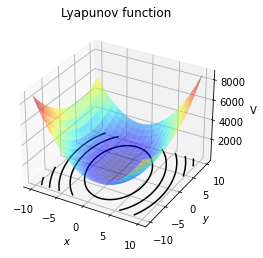

In [7]:
torch.manual_seed(167)
N_Dimensions = 3
x0, x1, x2 = initialise_states(N_Dimensions)

dynamics = [
    -x0**3 + x1,
    -x0 - x1
]
activations =  [ActivationType.SQUARE]
neurons = [10] 
parameters = {CegisConfig.ACTIVATION.k: activations, CegisConfig.N_HIDDEN_NEURONS.k:neurons, 
              CegisConfig.LLO.k:True, CegisConfig.SP_HANDLE.k:False
             }

mode = PrimerMode.LYAPUNOV

f_n, f_s = synthesise(dynamics, mode, OUTER_RADIUS=10, INNER_RADIUS=0.01, CEGIS_PARAMETERS=parameters)
x = np.array([x0,x1]).reshape(2,1)
plot_lyapunov_fcn(x, simplify_f(f_s), dynamics)

<a id='poly3'></a>
## Poly 3
\begin{cases}
\dot{x}= -x^3 - y^2, 
\\
\dot{y}= xy - y^3.
\end{cases}

Single Equilibrium point found: 
 [(0, 0)]
  learner   0
0 - loss: -0.04395664855837822 - acc: 98.2 %
100 - loss: -0.09272778034210205 - acc: 99.4 %
200 - loss: -0.022348348051309586 - acc: 99.6 %
300 - loss: -0.024965103715658188 - acc: 99.6 %
400 - loss: -0.02986432984471321 - acc: 99.8 %
500 - loss: -0.03802625089883804 - acc: 99.8 %
600 - loss: -0.050862569361925125 - acc: 99.6 %
700 - loss: -0.0715465247631073 - acc: 99.8 %
800 - loss: -0.10505744069814682 - acc: 99.8 %
900 - loss: -0.15920929610729218 - acc: 99.8 %
999 - loss: -0.018043139949440956 - acc: 99.8 %
  translator   0
Candidate: (pow(( - 31.758 * x0 + 5.189 * x1), 2) + pow(( - 31.171 * x0 + 5.679 * x1), 2) + pow(( - 26.627 * x0 + 24.985 * x1), 2) + pow(( - 19.24 * x0 + 13.36 * x1), 2) + pow(( - 15.343 * x0 - 17.54 * x1), 2) + pow(( - 12.197 * x0 + 18.421 * x1), 2) + pow((13.066 * x0 + 9.955 * x1), 2) + pow((20.001 * x0 + 37.768 * x1), 2) + pow((21.514 * x0 - 25.987 * x1), 2) + pow((22.801 * x0 + 11 * x1), 2))
  verifie

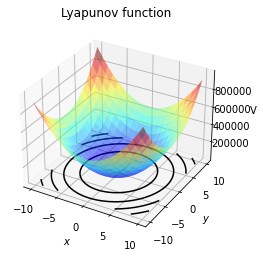

In [8]:
torch.manual_seed(167)
N_Dimensions = 2
x0, x1 = initialise_states(N_Dimensions)

dynamics = [
    -x0**3 -x1**2,
    x0*x1 - x1**3
    
]
activations =  [ActivationType.SQUARE]
neurons = [10] 
parameters = {CegisConfig.VERIFIER.k:VerifierType.DREAL, CegisConfig.ACTIVATION.k: activations, 
              CegisConfig.N_HIDDEN_NEURONS.k:neurons, CegisConfig.LLO.k:True, CegisConfig.SP_HANDLE.k:False}

mode = PrimerMode.LYAPUNOV

f_n, f_s = synthesise(dynamics, mode, OUTER_RADIUS=10, INNER_RADIUS = 0.01, CEGIS_PARAMETERS=parameters)
x = np.array([x0,x1]).reshape(2,1)
plot_lyapunov_fcn(x, simplify_f(f_s), dynamics)

<a id='poly4'></a>
## Poly 4
\begin{cases}
\dot{x}= - x - 1.5 x^2 y^3,
\\
\dot{y}=-y^3 + 0.5x^3 y^2.
\end{cases}

Single Equilibrium point found: 
 [(0, 0)]
  learner   0
0 - loss: 341.4746398925781 - acc: 80.4 %
  translator   0
Candidate: (pow(( - 0.119 * x0 - 0.071 * x1), 2) + pow((0.067 * x0 - 0.392 * x1), 2) + pow((0.17 * x0 + 0.503 * x1), 2) + pow((0.345 * x0 - 0.584 * x1), 2) + pow((0.355 * x0 + 0.343 * x1), 2))
  verifier   0
No counterexamples found!
  consolidator   0
Found a Lyapunov function
Learner times: total=0.10934630100018694s,min=0.10934630100018694s,max=0.10934630100018694s,avg=0.10934630100018694s
Translator times: total=0.0005922630007262342s,min=0.0005922630007262342s,max=0.0005922630007262342s,avg=0.0005922630007262342s
Verifier times: total=6.009673879001639s,min=6.009673879001639s,max=6.009673879001639s,avg=6.009673879001639s
Consolidator times: total=0s,min=9223372036854775808s,max=0s,avg=0s


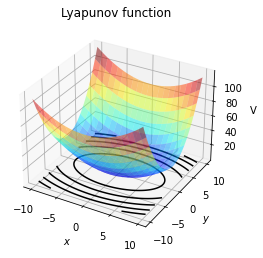

In [9]:
torch.manual_seed(167)
N_Dimensions = 2
x0, x1 = initialise_states(N_Dimensions)

dynamics = [
    -x0 - 1.5*x0**2*x1**3,
    -x1**3 + 0.5*x0**3*x1**2
]
activations =  [ActivationType.SQUARE]
neurons = [5] 
parameters = {CegisConfig.VERIFIER.k:VerifierType.DREAL,CegisConfig.ACTIVATION.k: activations, 
              CegisConfig.N_HIDDEN_NEURONS.k:neurons, CegisConfig.LLO.k:True, CegisConfig.SP_HANDLE.k:False}

mode = PrimerMode.LYAPUNOV

f_n, f_s = synthesise(dynamics, mode, OUTER_RADIUS=10, INNER_RADIUS = 0.01, CEGIS_PARAMETERS=parameters)
x = np.array([x0,x1]).reshape(2,1)
plot_lyapunov_fcn(x, simplify_f(f_s), dynamics)

<a id='hy-lyap'></a> 
## Hybrid Lyapunov

$$ f(x, y) = 
\begin{cases}
f_1 & \text{if } y < 0, \\
f_2 & \text{otherwise},
\end{cases}$$

where 

$$f_1 = 
\begin{cases}
\dot{x} = -x, \\
\dot{y} = - y - 0.5 x^3, \\
\end{cases}$$

$$f_2 = 
\begin{cases}
\dot{x} = -x, \\
\dot{y} =  -y -x^2 - 0.25 y^3, \\
\end{cases}$$


  learner   0
0 - loss: 785.2838745117188 - acc: 68.4 %
  translator   0
Candidate: (... + ... + ... + ... + ... + ... + ... + ... + ... + ...)*
...
  verifier   0
No counterexamples found!
  consolidator   0
Found a Lyapunov function
Learner times: total=0.33901313800015487s,min=0.33901313800015487s,max=0.33901313800015487s,avg=0.33901313800015487s
Translator times: total=0.8227179470013652s,min=0.8227179470013652s,max=0.8227179470013652s,avg=0.8227179470013652s
Verifier times: total=0.04091471499850741s,min=0.04091471499850741s,max=0.04091471499850741s,avg=0.04091471499850741s
Consolidator times: total=0s,min=9223372036854775808s,max=0s,avg=0s


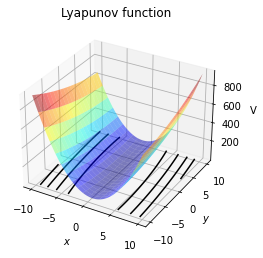

In [10]:
torch.manual_seed(167)
dynamics = hy_lyap
dimension = 2
activations =  [ActivationType.SQUARE]
neurons = [10]
verifier_type = VerifierType.DREAL

parameters = {CegisConfig.N_VARS.k: dimension, CegisConfig.VERIFIER.k: VerifierType.Z3, 
              CegisConfig.ACTIVATION.k: activations, CegisConfig.N_HIDDEN_NEURONS.k:neurons, 
              CegisConfig.SP_HANDLE.k: False, CegisConfig.SP_SIMPLIFY.k: False,
              CegisConfig.LLO.k: True, CegisConfig.BATCH_SIZE.k: 1000}

mode = PrimerMode.LYAPUNOV

f_n, f_s = synthesise(dynamics, mode, OUTER_RADIUS=10, CEGIS_PARAMETERS=parameters)

x = np.array([x0,x1]).reshape(2,1)
plot_lyapunov_fcn(x, simplify_f(f_s), dynamics)

# Barrier Function Benchmarks

<a id='darboux'></a>
## Barrier 1

$$ \begin{cases} \dot{x} = y + 2xy  \\ \dot{y} = -x - y^2 + 2x^2 \end{cases}$$

$$\begin{align*}
& X = \{ -2 \leq x, y \leq 2 \}, \\
& X_0 =  \{ 0 \leq x \leq 1, 1 \leq y \leq 2 \}, \\
& X_u = \{ x+y^2 \leq 0 \}
\end{align*}$$


  learner   0
0 - loss: 0.35143595933914185 - accuracy init-unsafe: 50.0 - accuracy belt: 0 - points in belt: 0
100 - loss: -3.5243349075317383 - accuracy init-unsafe: 100.0 - accuracy belt: 61.71617161716171 - points in belt: 303
200 - loss: -3.51829195022583 - accuracy init-unsafe: 100.0 - accuracy belt: 61.07382550335571 - points in belt: 298
300 - loss: -3.5757029056549072 - accuracy init-unsafe: 100.0 - accuracy belt: 61.07382550335571 - points in belt: 298
400 - loss: -3.5718491077423096 - accuracy init-unsafe: 99.9 - accuracy belt: 60.94276094276094 - points in belt: 297
500 - loss: -3.5985488891601562 - accuracy init-unsafe: 100.0 - accuracy belt: 61.07382550335571 - points in belt: 298
600 - loss: -3.629819393157959 - accuracy init-unsafe: 100.0 - accuracy belt: 61.461794019933556 - points in belt: 301
700 - loss: -3.617281436920166 - accuracy init-unsafe: 100.0 - accuracy belt: 61.07382550335571 - points in belt: 298
800 - loss: -3.6341848373413086 - accuracy init-unsafe: 100

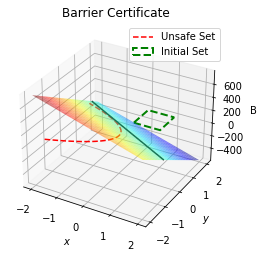

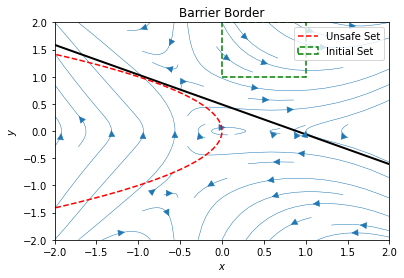

In [11]:
torch.manual_seed(167)
dynamics = barr_1
dimension = 2
activations =  [ActivationType.LINEAR]
neurons = [10] * len(activations)
verifier_type = VerifierType.DREAL

parameters = {CegisConfig.VERIFIER.k: verifier_type, CegisConfig.ACTIVATION.k: activations, 
              CegisConfig.N_HIDDEN_NEURONS.k:neurons, CegisConfig.N_VARS.k: dimension}

mode = PrimerMode.BARRIER

f_n, f_s = synthesise(dynamics, mode, CEGIS_PARAMETERS=parameters)
x = np.array([initialise_states(2)]).reshape(-1,1)
plot_darboux_bench(x, f_s)

<a id='elementary'></a>
## Barrier 2

$$\begin{cases}
\dot{x} = e^{-x} + y - 1 \\
\dot{y} = - \sin^2 x
\end{cases}$$

$$\begin{align*}
& X = \{-2 \leq x, y  \leq 2 \} \\ 
& X_0 = \{(x+0.5)^2+(y - 0.5)^2 \leq 0.16 \} \\ 
& X_u  = \{ (x - 0.7)^2+(y+0.7)^2 \leq 0.09 \}
\end{align*}$$




  learner   0
0 - loss: -0.2198912501335144 - accuracy init-unsafe: 50.0 - accuracy belt: 91.53225806451613 - points in belt: 496
100 - loss: -5.212582111358643 - accuracy init-unsafe: 100.0 - accuracy belt: 88.03191489361703 - points in belt: 376
200 - loss: -4.903604507446289 - accuracy init-unsafe: 99.9 - accuracy belt: 82.86445012787723 - points in belt: 391
300 - loss: -5.296963214874268 - accuracy init-unsafe: 98.1 - accuracy belt: 88.93709327548807 - points in belt: 461
400 - loss: -5.770838260650635 - accuracy init-unsafe: 99.6 - accuracy belt: 97.73299748110831 - points in belt: 397
500 - loss: -5.895694255828857 - accuracy init-unsafe: 100.0 - accuracy belt: 98.48484848484848 - points in belt: 396
600 - loss: -5.845238208770752 - accuracy init-unsafe: 100.0 - accuracy belt: 97.98994974874371 - points in belt: 398
700 - loss: -5.874325752258301 - accuracy init-unsafe: 99.6 - accuracy belt: 97.95918367346938 - points in belt: 392
800 - loss: -5.8651347160339355 - accuracy init-

No counterexamples found!
  consolidator   1
Certified!
Learner times: total=25.130285614002787s,min=12.48897384600059s,max=12.641311768002197s,avg=12.565142807001394s
Translator times: total=0.00520526400214294s,min=0.0024603540005045943s,max=0.0027449100016383454s,avg=0.00260263200107147s
Verifier times: total=0.4037084719966515s,min=0.153013014998578s,max=0.2506954569980735s,avg=0.20185423599832575s
Consolidator times: total=0.0022086249991843943s,min=0.0022086249991843943s,max=0.0022086249991843943s,avg=0.0022086249991843943s


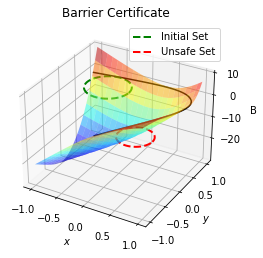

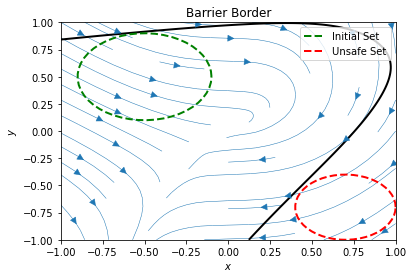

In [12]:
torch.manual_seed(167)
dynamics = barr_2
dimension = 2
activations =  [ActivationType.SOFTPLUS]
neurons = [20] 
verifier_type = VerifierType.DREAL

parameters = {CegisConfig.VERIFIER.k:verifier_type,CegisConfig.ACTIVATION.k: activations,
              CegisConfig.N_VARS.k: dimension,
              CegisConfig.N_HIDDEN_NEURONS.k:neurons, CegisConfig.SP_HANDLE.k:False, 
              CegisConfig.SP_SIMPLIFY.k:False, CegisConfig.SYMMETRIC_BELT.k: False}

mode = PrimerMode.BARRIER
f_n, f_s = synthesise(dynamics, mode, CEGIS_PARAMETERS=parameters)

x = np.array([initialise_states(2)]).reshape(-1,1)
plot_exponential_bench(x, f_s)

<a id='polynomial'></a>
## Barrier 3


$$ \begin{cases} \dot{x} = y  \\ \dot{y} = -x - y + \frac{1}{3} x^3 \end{cases}$$


$$\begin{align*}
& X = \{ -3.5 \leq x \leq 2,-2 \leq y \leq 1 \} 
\\
& X_0 = \{ (x-1.5)^2+y^2 \leq 0.25 \vee 
(x \geq -1.8 \wedge x \leq -1.2 \wedge y \geq -0.1 \wedge y \leq 0.1) 
\\
& \qquad\qquad \vee  (x \geq -1.4 \wedge x \leq -1.2 \wedge y\geq -0.5\wedge y \leq 0.1) \}
 \\
& X_u = \{ (x+1)^2+(y+1)^2 \leq 0.16 \vee
(x\geq 0.4 \wedge x\leq 0.6 \wedge y \geq 0.1 \wedge y\leq 0.5) 
\\
& \qquad\qquad \vee (x \geq 0.4 \wedge x \leq 0.8 \wedge y \geq 0.1 \wedge y \leq 0.3) \}
\end{align*}$$


  learner   0
0 - loss: 0.23090709745883942 - accuracy init-unsafe: 50.0 - accuracy belt: 0 - points in belt: 0
100 - loss: 0.06377644836902618 - accuracy init-unsafe: 68.20866141732283 - accuracy belt: 15.625 - points in belt: 288
200 - loss: -3.4263501167297363 - accuracy init-unsafe: 63.48425196850393 - accuracy belt: 65.21739130434783 - points in belt: 368
300 - loss: -5.2791361808776855 - accuracy init-unsafe: 89.76377952755905 - accuracy belt: 97.61092150170649 - points in belt: 293
400 - loss: -5.944088459014893 - accuracy init-unsafe: 99.70472440944881 - accuracy belt: 100.0 - points in belt: 312
500 - loss: -5.975905895233154 - accuracy init-unsafe: 99.80314960629921 - accuracy belt: 100.0 - points in belt: 309
600 - loss: -5.908348083496094 - accuracy init-unsafe: 99.50787401574803 - accuracy belt: 98.72204472843451 - points in belt: 313
700 - loss: -5.925826072692871 - accuracy init-unsafe: 99.50787401574803 - accuracy belt: 98.98305084745763 - points in belt: 295
800 - loss

[]
None
Counterexample Found: x0 : [0.4194117546081544967, 0.4194118499755861151]
x1 : [0.1031250000000000083, 0.1031250953674316406]
  consolidator   0
  learner   1
0 - loss: -5.934298515319824 - accuracy init-unsafe: 97.78206364513018 - accuracy belt: 99.0506329113924 - points in belt: 316
  translator   1
Candidate: ((-4.5970001220703125 / (1 + exp((-1.3700000047683716 - (-4.1999998092651367 / (1 + exp((3.6180000305175781 + 0.057999998331069946 * x0 - 3.5859999656677246 * x1)))) - (-3.9820001125335693 / (1 + exp((2.1510000228881836 - 5.0130000114440918 * x0 - 4.745999813079834 * x1)))) - (-3.9630000591278076 / (1 + exp((1.8470000028610229 - 5.6869997978210449 * x0 - 2.9440000057220459 * x1)))) - (-3.7929999828338623 / (1 + exp((3.2090001106262207 + 0.23399999737739563 * x0 - 3.2279999256134033 * x1)))) - (-3.2599999904632568 / (1 + exp((4.0180001258850098 - 0.36100000143051147 * x0 - 3.7190001010894775 * x1)))) - (-1.6820000410079956 / (1 + exp((5.9670000076293945 + 2.7400000095367

None
None
  consolidator   1
  learner   2
0 - loss: -5.545522212982178 - accuracy init-unsafe: 100.0 - accuracy belt: 92.67515923566879 - points in belt: 314
  translator   2
Candidate: ((-4.8350000381469727 / (1 + exp((-1.5379999876022339 - (-4.0590000152587891 / (1 + exp((1.9320000410079956 - 6.0079998970031738 * x0 - 2.940000057220459 * x1)))) - (-3.9700000286102295 / (1 + exp((2.0520000457763672 - 5.6630001068115234 * x0 - 4.1100001335144043 * x1)))) - (-3.4430000782012939 / (1 + exp((3.6819999217987061 + 0.50999999046325684 * x0 - 3.1700000762939453 * x1)))) - (-2.9130001068115234 / (1 + exp((3.380000114440918 + 1.0349999666213989 * x0 - 2.6940000057220459 * x1)))) - (-2.5130000114440918 / (1 + exp((2.8880000114440918 - 1.2539999485015869 * x0 - 4.9340000152587891 * x1)))) - (-1.1660000085830688 / (1 + exp((5.6739997863769531 + 2.4879999160766602 * x0 - 4.3470001220703125 * x1)))) - (-0.89899998903274536 / (1 + exp((5.1279997825622559 + 2.7699999809265137 * x0 - 1.047000050544738

Translator times: total=0.04483104799510329s,min=0.01447878700128058s,max=0.015274686997145182s,avg=0.01494368266503443s
Verifier times: total=18.366071370997815s,min=1.885804689998622s,max=8.303043461000925s,avg=6.122023790332605s
Consolidator times: total=0.0033317660017928574s,min=0.0033317660017928574s,max=0.0033317660017928574s,avg=0.0033317660017928574s


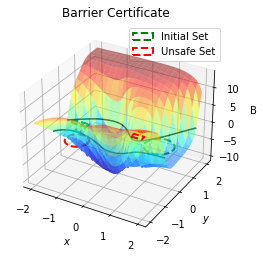

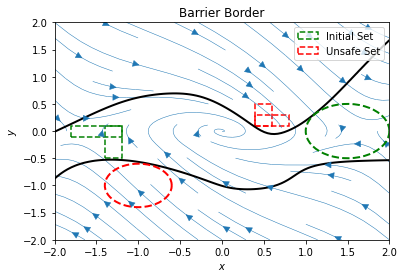

In [13]:
torch.manual_seed(167)
dynamics = barr_3

dimension = 2
activations =  [ActivationType.SIGMOID, ActivationType.SIGMOID]
neurons = [20, 20] 
verifier_type = VerifierType.DREAL

parameters = {CegisConfig.VERIFIER.k:verifier_type,CegisConfig.ACTIVATION.k: activations, 
              CegisConfig.N_VARS.k: dimension,
              CegisConfig.N_HIDDEN_NEURONS.k:neurons, CegisConfig.SYMMETRIC_BELT.k:False,
              CegisConfig.SP_HANDLE.k:False, CegisConfig.SP_SIMPLIFY.k:False}

mode = PrimerMode.BARRIER
f_n, f_s = synthesise(dynamics, mode, CEGIS_PARAMETERS=parameters)

x = np.array([initialise_states(2)]).reshape(-1,1)
plot_pjmod_bench(x, f_s)

<a id='obstacle'></a>
## Barrier 4


$$\begin{cases}
    \dot{x} = v \sin \varphi, \\
    \dot{y} = v \cos \varphi, \\
    \dot{\varphi} = u, \quad \textrm{ where } \quad u = - \sin \varphi + 3 \cdot \frac{x \sin \varphi + y \cos \varphi}{0.5 + x^2 + y^2},
    \end{cases}$$,
    $$\begin{align*}
    & X = \{ -2 \leq x,y \leq 2,-\frac{\pi}{2}< \varphi < \frac{\pi}{2} \}, \\
    & X_0 = \{ -0.1 \leq x \leq 0.1, - 2 \leq y \leq -1.8,-\frac{\pi}{6}< \varphi< \frac{\pi}{6} \}, \\
    & X_u = \{ x^2+ y^2  \leq 0.04 \},
    \end{align*}$$,


In [14]:
torch.manual_seed(167)
dynamics = obstacle_avoidance

dimension = 3
activations =  [ActivationType.LIN_TO_CUBIC]
neurons = [5] 
verifier_type = VerifierType.DREAL

parameters = {CegisConfig.VERIFIER.k:verifier_type,CegisConfig.ACTIVATION.k: activations, 
              CegisConfig.N_VARS.k: dimension,
              CegisConfig.N_HIDDEN_NEURONS.k:neurons,
              CegisConfig.SP_HANDLE.k:False, CegisConfig.SP_SIMPLIFY.k:False, CegisConfig.BATCH_SIZE.k:2000}

mode = PrimerMode.BARRIER
f_n, f_s = synthesise(dynamics, mode, CEGIS_PARAMETERS=parameters)

  learner   0
0 - loss: -0.24276743829250336 - accuracy init-unsafe: 96.25 - accuracy belt: 38.91304347826087 - points in belt: 460
100 - loss: -3.008453369140625 - accuracy init-unsafe: 99.675 - accuracy belt: 50.847457627118644 - points in belt: 472
200 - loss: -3.925248384475708 - accuracy init-unsafe: 100.0 - accuracy belt: 65.50387596899225 - points in belt: 516
300 - loss: -5.763478755950928 - accuracy init-unsafe: 100.0 - accuracy belt: 96.1767204757859 - points in belt: 1177
400 - loss: -5.796407699584961 - accuracy init-unsafe: 99.55 - accuracy belt: 97.28155339805825 - points in belt: 1030
  translator   0
Candidate: ( - 3.775 * (-3.5510001182556152 - 1.4459999799728394 * x0 + 4.5089998245239258 * x1 - 0.52600002288818359 * x2) + 0.68599998950958252 * pow((-0.28099998831748962 - 2.5090000629425049 * x0 + 0.36899998784065247 * x1 + 2.5260000228881836 * x2), 2) + 0.99500000476837158 * pow((0.087999999523162842 - 1.7220000028610229 * x0 - 1.0349999666213989 * x1 - 1.771999955177

[]
None
Counterexample Found: x0 : [0.09990942552412757083, 0.09990948738618335434]
x1 : [0.1468245374543851178, 0.1468245836551854422]
x2 : [1.503798297086675895, 1.503798380521705891]
  consolidator   4
  learner   5
0 - loss: -5.990411281585693 - accuracy init-unsafe: 99.49103247697528 - accuracy belt: 100.0 - points in belt: 834
  translator   5
Candidate: ( - 3.602 * (-3.3849999904632568 - 1.5729999542236328 * x0 + 4.3020000457763672 * x1 - 0.17100000381469727 * x2) + 0.69300001859664917 * pow((-0.335999995470047 - 2.1070001125335693 * x0 + 0.24899999797344208 * x1 + 2.684999942779541 * x2), 2) + 0.88700002431869507 * pow((0.15399999916553497 - 1.6089999675750732 * x0 - 0.92500001192092896 * x1 - 1.6430000066757202 * x2), 3) - 0.5910000205039978 * pow((0.99599999189376831 - 0.5339999794960022 * x0 + 1.6000000238418579 * x1 - 1.2860000133514404 * x2), 3) - 1.2910000085830688 * pow((1.031000018119812 - 1.0839999914169312 * x0 - 1.659000039100647 * x1 - 0.88899999856948853 * x2), 3))

Counterexample Found: x0 : [-0.188606152745283806, -0.1886061046445512979]
x1 : [0.4687494635581970215, 0.4687495231628417969]
x2 : [1.56861398765183524, 1.568614028428321649]
None
None
  consolidator   9
  learner   10
0 - loss: -5.833883762359619 - accuracy init-unsafe: 100.0 - accuracy belt: 97.50283768444949 - points in belt: 881
  translator   10
Candidate: ( - 3.828 * (-2.8280000686645508 - 2.2460000514984131 * x0 + 4.8940000534057617 * x1 - 0.39500001072883606 * x2) + 0.93999999761581421 * pow((-0.28999999165534973 - 1.593000054359436 * x0 - 0.064000003039836884 * x1 + 3.246999979019165 * x2), 2) + 0.67199999094009399 * pow((0.22300000488758087 - 1.3960000276565552 * x0 - 0.88400000333786011 * x1 - 1.2000000476837158 * x2), 3) - 0.69900000095367432 * pow((1 - 0.24199999868869781 * x0 + 1.8760000467300415 * x1 - 0.76700001955032349 * x2), 3) - 1.3500000238418579 * pow((1.1920000314712524 - 0.76200002431869507 * x0 - 1.7070000171661377 * x1 - 0.85000002384185791 * x2), 3))
  verif

<a id='hybrid'></a>
## Hybrid Barrier

$$
f_1 = 
\begin{cases}
\dot{x} = y \newline
\dot{y} = - x - 0.5 x^3 \newline
\end{cases}
\qquad
f_2 = 
\begin{cases}
\dot{x} = y \newline
\dot{y} =  x - 0.25 y^2 \newline
\end{cases}$$

$$ \text{Domain for } f_1 = \{ (x,y): x < 0 \} \qquad \text{Domain for } f_2 = \{ (x,y): x\geq 0 \}$$

$$\begin{align*}
& X = \{ x^2 + y^2 \leq 4 \} \\ 
& X_0 = \{ (x+1)^2 + (y+1)^2 \leq 0.25 \} \\ 
& X_u = \{ (x-1)^2 + (y-1)^2 \leq 0.25 \}
\end{align*}$$



In [15]:
torch.manual_seed(167)

dynamics = twod_hybrid
dimension = 2
activations =  [ActivationType.LIN_SQUARE]
neurons = [3] 
verifier_type = VerifierType.Z3

parameters = {CegisConfig.VERIFIER.k:verifier_type,CegisConfig.ACTIVATION.k: activations, 
              CegisConfig.N_VARS.k: dimension,
              CegisConfig.N_HIDDEN_NEURONS.k:neurons, CegisConfig.SYMMETRIC_BELT.k:False, 
              CegisConfig.SP_HANDLE.k:False, CegisConfig.SP_SIMPLIFY.k:False}

mode = PrimerMode.BARRIER
f_n, f_s = synthesise(dynamics, mode, CEGIS_PARAMETERS=parameters)

  learner   0
0 - loss: 0.07103800028562546 - accuracy init-unsafe: 29.3 - accuracy belt: 7.643312101910828 - points in belt: 314
100 - loss: -5.815310478210449 - accuracy init-unsafe: 100.0 - accuracy belt: 99.41520467836257 - points in belt: 342
200 - loss: -5.8463945388793945 - accuracy init-unsafe: 100.0 - accuracy belt: 99.69788519637463 - points in belt: 331
300 - loss: -5.857110500335693 - accuracy init-unsafe: 100.0 - accuracy belt: 99.6951219512195 - points in belt: 328
400 - loss: -5.858522891998291 - accuracy init-unsafe: 100.0 - accuracy belt: 99.6845425867508 - points in belt: 317
  translator   0
Candidate: (-10115000009536743/5000000000000000*
 (-2199999988079071/200000000000000000*x0 +
  -15720000267028809/10000000000000000*x1 +
  22669999599456787/10000000000000000) +
 -263100004196167/50000000000000*
 (-423199987411499/200000000000000*x0 +
  -726800012588501/200000000000000*x1 +
  27960000038146973/10000000000000000)**
 2 +
 19255000352859497/5000000000000000*
 (-6340

<a id='hi-ord4'></a>
## Hi-Ord 4

$$\begin{align}
& 2273 x^{(4)} + 3980 x^{(3)} + 4180 x^{(2)} + 2400 x^{(1)} + 576 = 0, 
\end{align}$$

where $ x^i $ represents the $i^{th}$ derivative of $x$.

In [16]:
torch.manual_seed(167)

dynamics = hi_ord_4
dimension = 4
activations =  [ActivationType.LINEAR]
neurons = [20] 
verifier_type = VerifierType.DREAL

parameters = {CegisConfig.VERIFIER.k:verifier_type,CegisConfig.ACTIVATION.k: activations, 
              CegisConfig.N_VARS.k: dimension, CegisConfig.BATCH_SIZE.k: 1000,
              CegisConfig.N_HIDDEN_NEURONS.k:neurons, CegisConfig.SYMMETRIC_BELT.k:False, 
              CegisConfig.SP_HANDLE.k:True, CegisConfig.SP_SIMPLIFY.k:True, CegisConfig.ROUNDING.k: 2}

mode = PrimerMode.BARRIER
f_n, f_s = synthesise(dynamics, mode, CEGIS_PARAMETERS=parameters)

  learner   0
0 - loss: -3.373413324356079 - accuracy init-unsafe: 98.05 - accuracy belt: 56.22568093385214 - points in belt: 514
100 - loss: -5.212804317474365 - accuracy init-unsafe: 100.0 - accuracy belt: 86.86006825938567 - points in belt: 586
200 - loss: -5.214147567749023 - accuracy init-unsafe: 100.0 - accuracy belt: 86.88245315161839 - points in belt: 587
300 - loss: -5.212803840637207 - accuracy init-unsafe: 100.0 - accuracy belt: 86.86006825938567 - points in belt: 586
400 - loss: -5.238133430480957 - accuracy init-unsafe: 100.0 - accuracy belt: 87.28222996515679 - points in belt: 574
500 - loss: -5.317925930023193 - accuracy init-unsafe: 100.0 - accuracy belt: 88.61209964412811 - points in belt: 562
600 - loss: -5.363837718963623 - accuracy init-unsafe: 100.0 - accuracy belt: 89.37728937728937 - points in belt: 546
700 - loss: -5.429237365722656 - accuracy init-unsafe: 100.0 - accuracy belt: 90.46728971962617 - points in belt: 535
800 - loss: -5.463032245635986 - accuracy in

Candidate: (-2.092599920516462 - 1.0708999689467253 * x0 - 1.0437000041559337 * x1 - 1.056399983881414 * x2 - 1.1172999597199269 * x3)
  verifier   2
No counterexamples found!
  consolidator   2
Certified!
Learner times: total=57.140371486999356s,min=18.200910943000054s,max=20.15223881199927s,avg=19.046790495666453s
Translator times: total=0.3320220559980953s,min=0.10781988099915907s,max=0.11249392199897557s,avg=0.11067401866603177s
Verifier times: total=0.009430379002878908s,min=0.0023212110027088784s,max=0.0046032089994696435s,avg=0.0031434596676263027s
Consolidator times: total=0.01610830800200347s,min=0.001560923999932129s,max=0.01454738400207134s,avg=0.008054154001001734s


<a id='hi-ord6'></a>
## Hi-Ord 6

$$\begin{align}
& 170 x^{(6)} + 800 x^{(5)} + 2273 x^{(4)} + 3980 x^{(3)} 
\\ \nonumber
& + 4180 x^{(2)} + 2400 x^{(1)} + 576 = 0, 
\end{align}$$

where $ x^i $ represents the $i^{th}$ derivative of $x$.

In [17]:
torch.manual_seed(167)

dynamics = hi_ord_6
dimension = 6
activations =  [ActivationType.LINEAR]
neurons = [10] 
verifier_type = VerifierType.DREAL

parameters = {CegisConfig.VERIFIER.k:verifier_type,   CegisConfig.ACTIVATION.k: activations, 
              CegisConfig.N_VARS.k: dimension,        CegisConfig.BATCH_SIZE.k: 1000,
              CegisConfig.N_HIDDEN_NEURONS.k:neurons, CegisConfig.SYMMETRIC_BELT.k:False, 
              CegisConfig.SP_HANDLE.k:True,           CegisConfig.SP_SIMPLIFY.k:True, 
              CegisConfig.ROUNDING.k: 2}

mode = PrimerMode.BARRIER
f_n, f_s = synthesise(dynamics, mode, CEGIS_PARAMETERS=parameters)

  learner   0
0 - loss: -3.8546576499938965 - accuracy init-unsafe: 100.0 - accuracy belt: 64.27525622254758 - points in belt: 683
100 - loss: -5.8685221672058105 - accuracy init-unsafe: 100.0 - accuracy belt: 97.78869778869779 - points in belt: 407
200 - loss: -5.8685221672058105 - accuracy init-unsafe: 100.0 - accuracy belt: 97.78869778869779 - points in belt: 407
300 - loss: -5.8685221672058105 - accuracy init-unsafe: 100.0 - accuracy belt: 97.78869778869779 - points in belt: 407
400 - loss: -5.869493007659912 - accuracy init-unsafe: 100.0 - accuracy belt: 97.8048780487805 - points in belt: 410
500 - loss: -5.855214595794678 - accuracy init-unsafe: 100.0 - accuracy belt: 97.5669099756691 - points in belt: 411
600 - loss: -5.8562726974487305 - accuracy init-unsafe: 100.0 - accuracy belt: 97.58454106280193 - points in belt: 414
700 - loss: -5.842926979064941 - accuracy init-unsafe: 100.0 - accuracy belt: 97.3621103117506 - points in belt: 417
800 - loss: -5.844057559967041 - accuracy 

<a id='hi-ord8'></a>
## Hi-Ord 8


\begin{align}
	& x^{(8)} + 20 x^{(7)} + 170 x^{(6)} + 800 x^{(5)} + 2273 x^{(4)} 
	\\ \nonumber 
	& \qquad + 3980 x^{(3)} + 4180 x^{(2)} + 2400 x^{(1)} + 576 = 0, 
\end{align}
where $ x^i $ represents the $i^{th}$ derivative of $x$.

In [18]:
torch.manual_seed(167)

dynamics = hi_ord_8
dimension = 8
activations =  [ActivationType.LINEAR]
neurons = [10] 
verifier_type = VerifierType.DREAL

parameters = {CegisConfig.VERIFIER.k:verifier_type,CegisConfig.ACTIVATION.k: activations, 
              CegisConfig.N_VARS.k: dimension, CegisConfig.BATCH_SIZE.k: 1000, 
              CegisConfig.N_HIDDEN_NEURONS.k:neurons, CegisConfig.SYMMETRIC_BELT.k:False, 
              CegisConfig.SP_HANDLE.k:True, CegisConfig.SP_SIMPLIFY.k:True, CegisConfig.ROUNDING.k: 2}

mode = PrimerMode.BARRIER
f_n, f_s = synthesise(dynamics, mode, CEGIS_PARAMETERS=parameters)

  learner   0
0 - loss: -2.765930652618408 - accuracy init-unsafe: 0.0 - accuracy belt: 54.936708860759495 - points in belt: 790
100 - loss: -5.620918273925781 - accuracy init-unsafe: 100.0 - accuracy belt: 93.66197183098592 - points in belt: 142
200 - loss: -5.62357759475708 - accuracy init-unsafe: 100.0 - accuracy belt: 93.7062937062937 - points in belt: 143
300 - loss: -5.6313371658325195 - accuracy init-unsafe: 100.0 - accuracy belt: 93.83561643835617 - points in belt: 146
400 - loss: -5.638783931732178 - accuracy init-unsafe: 100.0 - accuracy belt: 93.95973154362416 - points in belt: 149
500 - loss: -5.559482097625732 - accuracy init-unsafe: 100.0 - accuracy belt: 92.63803680981596 - points in belt: 163
600 - loss: -5.623841285705566 - accuracy init-unsafe: 100.0 - accuracy belt: 93.71069182389937 - points in belt: 159
700 - loss: -5.663699626922607 - accuracy init-unsafe: 100.0 - accuracy belt: 94.375 - points in belt: 160
800 - loss: -5.689511299133301 - accuracy init-unsafe: 10